In [1]:
import numpy as np
import torch
import torch.nn as nn

In [2]:
a = np.array([[1,2,3,4],[4,5,6,7],[11,21,31,41],[41,51,61,71]])

In [3]:
a, a.shape

(array([[ 1,  2,  3,  4],
        [ 4,  5,  6,  7],
        [11, 21, 31, 41],
        [41, 51, 61, 71]]),
 (4, 4))

In [4]:
hidden_dim = 128; n_nodes = 100; batch_size = 120; node_dim = 2 #x,y

In [5]:
x = torch.randn(batch_size, n_nodes, hidden_dim) #batch_size x n_nodes x hidden_dim
batch_norm = nn.BatchNorm1d(hidden_dim, track_running_stats=False)

In [6]:
nodes_embedding = nn.Linear(node_dim, hidden_dim, bias=False)
x_nodes = np.random.uniform(size=(n_nodes, node_dim))

In [7]:
#print(batch_norm(x))
#print(x.size())
print(x_nodes[:,1])

[4.72323516e-01 1.47781226e-01 7.94014919e-01 3.11967295e-02
 4.01667346e-01 4.05832498e-01 6.81858558e-01 8.06029809e-01
 3.16073148e-01 2.88266088e-01 4.53129757e-01 9.75939655e-01
 3.40397272e-01 2.26660216e-01 3.31258519e-01 7.51849283e-01
 4.32027431e-01 7.43248564e-01 8.93994704e-01 5.68325293e-01
 6.51312997e-01 3.89235766e-01 4.15828165e-02 8.49990448e-01
 1.54804230e-01 5.10469039e-02 4.66901213e-01 1.21798566e-02
 9.64079291e-01 5.62455685e-02 3.10268384e-02 9.93077677e-01
 1.65250337e-01 8.85753582e-01 7.60276252e-01 9.04592470e-01
 6.36018324e-01 9.46513747e-01 1.19006307e-01 1.01136965e-01
 5.81293881e-02 3.33429210e-01 4.97162401e-01 2.74012374e-01
 7.58822377e-01 6.74189784e-01 4.58152738e-01 1.17095444e-01
 2.92998064e-01 4.96797207e-01 8.15604645e-01 9.00575254e-01
 9.02960952e-01 1.34586131e-01 4.27273388e-01 9.82020258e-01
 1.89540852e-01 8.41107833e-01 3.30954482e-03 6.13323050e-01
 7.79458729e-01 6.44976266e-01 5.05104551e-01 6.46047920e-01
 2.34865159e-01 9.913187

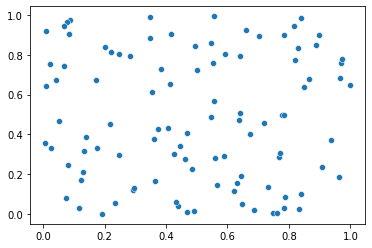

In [8]:
import exper.plotter as _plt

_plt.Plotter.scatter_plot(x_nodes)

In [9]:
x_trans = x.transpose(1,2).contiguous()
x_trans_bn = batch_norm(x_trans)
x_bn = x_trans_bn.transpose(1,2).contiguous()

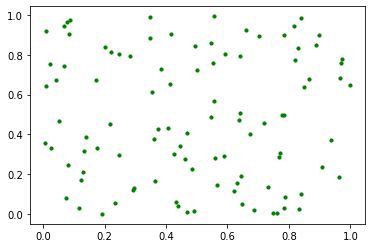

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

x, y = x_nodes.T
#sns.scatterplot(x=x,y=y)
#sns.scatterplot(data=x_nodes, x=0, y=1)
plt.scatter(x, y, s=10, c='g')
plt.show()

In [11]:
print(x_bn.size())

torch.Size([120, 100, 128])


In [12]:
import sys
sys.path

['/Users/vbloise/Desktop/MasterInAI/MT-Umberto/Project/NeuroLKH',
 '/Users/vbloise/miniconda3/envs/py39/lib/python39.zip',
 '/Users/vbloise/miniconda3/envs/py39/lib/python3.9',
 '/Users/vbloise/miniconda3/envs/py39/lib/python3.9/lib-dynload',
 '',
 '/Users/vbloise/miniconda3/envs/py39/lib/python3.9/site-packages',
 '/Users/vbloise/Desktop/MasterInAI/MT-Umberto/Project/ML-Constructive/pyconcorde']

In [13]:
#sys.path.append('/Users/vbloise/Desktop/MasterInAI/MT-Umberto/Project/NeuroLKH/')

In [4]:
import intf.lkh_helper as lkh_h

node_dim = 2
for seq in range(2):
    prob_size = 1000
    inst_name = f'{prob_size}_{seq}'
    inst_filename = f'result/{prob_size}/tsp/{inst_name}.tsp'

    inst = np.random.uniform(size=(prob_size, node_dim))
    #_ = lkh_h.solve_LKH(prob_size, inst, inst_name, rerun=True)
    lkh_h.write_instance(inst, inst_name, inst_filename)

In [23]:
_ = lkh_h.solve_LKH(prob_size, x_nodes, inst_name, rerun=True)

In [ ]:
print(t.__file__)

In [ ]:
!export PYTHONPATH=../
!echo $PYTHONPATH
!env | grep PY